## 프로젝트 개요

### 목적


웨이퍼 식각 후 테스트 단계에서 센서 측정값의 1시간 평균 데이터를 분석하여 저수율 요인을 찾고자 한다.

테스트 과정에서 웨이퍼 상태의 반도체 칩의 불량 여부를 선별 가능하다.

저수율 요인을 찾아 설계상의 문제점이나 제조상의 문제점을 발견해 수정 가능하다.

### 웨이퍼 식각 공정이란?

반도체 공정 중 하나 <br>
TFT(박만 트랜지스터)의 회로 패턴을 만들기 위해, 웨이퍼의 필요한 부분만을 남기고 불필요한 부분을 깎아내는 과정

### 저수율 웨이퍼가 발생하는 원인

반도체 공정의 각 프로세서에서 레시피(온도, 압력, 가공시간 등) 대로 작업이 이루어지지 않았기 때문이다.

### 저수율 요인 파악의 필요성

공정 중 저수율 요인을 찾아낸다면 해당 프로세서의 집중적인 관리를 통해 고수율 웨이퍼의 생산 효율을 극대화 할 수 있다.<br>
최적의 Etching 공정 레시피를 제공할 수 있다.

## 생산 공정 중 양품 / 불량품에 큰 영향을 미치는 저수율 요인을 찾아내는 것이 목표

## 기본 임포트

In [ ]:
!pip install matplotlib -U
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.family']=['NanumGothic','sans-serif']
plt.rcParams['axes.unicode_minus']=False
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib as mpl
import platform
import warnings
import datetime
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
# pd.options.display.max_rows = 5500
# pd.options.display.max_columns = 20

In [2]:
from google.colab import drive
drive.mount('/content/drive')
#구글드라이브연동

Mounted at /content/drive


In [ ]:
# !pip install pytimekr
# from pytimekr import pytimekr

## 데이터 로드 및 기본 확인

In [3]:
data = pd.read_csv('/content/drive/MyDrive/hellovision/factory/factory_glass_2016.csv', encoding='euc-kr')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8145 entries, 0 to 8144
Columns: 841 entries, dat...date.name. to R.Vac
dtypes: float64(834), int64(6), object(1)
memory usage: 52.3+ MB


초기 데이터 shape은 8415 x 841 형태로, 841개의 column이 존재한다.

In [ ]:
data.head()

,dat...date.name.,LIFT.OUT.ROL.MTR.M1.SPD.1WSI40101,LIFT.OUT.ROL.MTR.M2.SPD.1WSI40102,LIFT.OUT.ROL.MTR.M3.SPD.1WSI40103,LEHR.DRV.MTR..M4.1.SPD.1WSI40104,LEHR.DRV.MTR..M4.2.SPD.1WSI40105,LEHR.DRV.MTR..M5.1.SPD.1WSI40106,LEHR.DRV.MTR..M5.2.SPD.1WSI40107,LEHR.DRV.MTR..M6.1.SPD.1WSI40108,LEHR.DRV.MTR..M6.2.SPD.1WSI40109,LEHR.DRV.MTR..M7.1.SPD.1WSI40110,LEHR.DRV.MTR..M7.2.SPD.1WSI40111,LEHR.DRV.MTR..M8.1.SPD.1WSI40112,LEHR.DRV.MTR..M8.2.SPD.1WSI40113,LEHR.DRV.MTR..M9.1.SPD.1WSI40114,LEHR.DRV.MTR..M9.2.SPD.1WSI40115,DRIVE.MOTOR.M10.1.SPEED.1WSI40116,LEHR.DRV.MTR..M10.2.SPD.1WSI40117,LEHR.DRV.MTR..M11.1.SPD.1WSI40118,DRIVE.MOTOR.M11.2.SPEED.1WSI40119,LEHR.DRV.MTR..M12.1.SPD.1WSI40120,LEHR.DRV.MTR..M12.2.SPD.1WSI40121,LEHR.DRV.MTR..M13.1.SPD.1WSI40122,LEHR.DRV.MTR..M13.2.SPD.1WSI40123,LEHR.DRV.MTR..M14.1.SPD.1WSI40124,LEHR.DRV.MTR..M14.2.SPD.1WSI40125,LEHR.DRV.MTR..M15.1.SPD.1WSI40126,LEHR.DRV.MTR..M15.2.SPD.1WSI40127,LEHR.DRV.MTR..M16.1.SPD.1WSI40128,DRIVE.MOTOR.M16.2.SPEED.1WSI40129,LEHR.DRV.MTR..M17.1.SPD.1WSI40130,LEHR.DRV.MTR..M17.2.SPD.1WSI40131,LEHR.DRV.MTR..M18.1.SPD.1WSI40132,LEHR.DRV.MTR..M18.2.SPD.1WSI40133,DRIVE.MOTOR.M19.1.SPEED.1WSI40134,LEHR.DRV.MTR..M19.2.SPD.1WSI40135,X1WOS45101_PV,X1WOS45102_PV,X1WOS45103_PV,X1WOS45104_PV,X1WOS45105_PV,X1WOS45106_PV,X1WOS45107_PV,X1WOS45108_PV,X1WOS45109_PV,X1WOS45110_PV,DCS_Offset_RPM_M11.1WOS45111_PV,DCS_Offset_RPM_M12.1WOS45112_PV,DCS_Offset_RPM_M13.1WOS45113_PV,DCS_Offset_RPM_M14.1WOS45114_PV,DCS_Offset_RPM_M15.1WOS45115_PV,DCS_Offset_RPM_M16.1WOS45116_PV,DCS_Offset_RPM_M17.1WOS45117_PV,DCS_Offset_RPM_M18.1WOS45118_PV,DCS_Offset_RPM_M19.1WOS45119_PV,DAMP.POSITION.0.BAY.CTRL.1TIC33420.PV,DAMP.POSITION.1.BAY.CTRL.1TIC33421.PV,DAMP.POSITION.2.BAY.CTRL.1TIC33422.PV,DAMP.POSITION.3.BAY.CTRL.1TIC33423.PV,DAMP.POSITION.4.BAY.CTRL.1TIC33424.PV,DAMP.POSITION.5BAY.CTRL.1TIC33425.PV,DAMP.POSITION.6.BAY.CTRL.1TIC33426.PV,DAMP.POSITION.7.BAY.CTRL.1TIC33427.PV,DAMP.POSITION.8BAY.CTRL.1TIC33428.PV,DAMP.POSITION.9.BAY.CTRL.1TIC33429.PV,DAMP.POSITION10.BAY.CTRL.1TIC33430.PV,DAMP.POSITION.11BAY.CTRL.1TIC33431.PV,DB.N2.SCREEN.FLOW.LEFT.1FI49011_PV,DB.N2.SCREEN.FLOW.RIGHT.1FI49012_PV,N2.TO.EA1313A.1FI33503A_PV,ROOF.HEATING.Zone.1.1JIC31101.PV,ROOF.HEATING.Zone.2.1JIC31102.PV,ROOF.HEATING.Zone.3.1JIC31103.PV,ROOF.HEATING.Zone.4.1JIC31104.PV,ROOF.HEATING.Zone.7.1JIC31107.PV,ROOF.HEATING.Zone.8.1JIC31108.PV,ROOF.HEATING.Zone.9.1JIC31109.PV,ATM.FLOW.SECT.6.N2.H2.1FI33410.PV,ATM.FLOW.SECT.7.N2.H2.1FI33412.PV,ATM.FLOW.SECT.8.N2.H2.1FI33414.PV,ATM.FLOW.SECT.9.N2.1FIC33415.PV,ATM.FLOW.SECT.9.N2.H2.1FIC33416.PV,ATM.FLOW.SECT.10.N2.H2.1FIC33418.PV,SEC11.N2.1FIC33425.PV,SEC11.N2.H2.9..1FIC33426.PV,cluster,ML.Speed,Ribbon.Speed,Gross.width,Left.edge,Right.edge,UPPER.AB1.Z1.TMP.1TIC41101.PV,UPPER.AB1.Z2.TMP.1TIC41102.PV,UPPER.AB1.Z3.TMP.1TIC41103.PV,UPPER.AB1.Z4.TMP.1TIC41104.PV,UPPER.AB1.Z5.TMP.1TIC41105.PV,UPPER.AB1.Z6.TMP.1TIC41106.PV,UPPER.AB1.Z7.TMP.1TIC41107.PV,LOWER.AB1.Z8.TMP.1TIC41151.PV,LOWER.AB1.Z9.TMP.1TIC41152.PV,LOWER.AB1.Z11.TMP.1TIC41154.PV,LOWER.AB1.Z13.TMP.1TIC41156.PV,LOWER.AB1.Z14.TMP.1TIC41157.PV,UPPER.AB2.Z15.TMP.1TIC41201.PV,UPPER.AB2.Z16.TMP.1TIC41202.PV,UPPER.AB2.Z17.TMP.1TIC41203.PV,UPPER.AB2.Z18.TMP.1TIC41204.PV,UPPER.AB2.Z19.TMP.1TIC41205.PV,UPPER.AB2.Z20.TMP.1TIC41206.PV,UPPER.AB2.Z21.TMP.1TIC41207.PV,LOWER.AB2.Z22.TMP.1TIC41251.PV,LOWER.AB2.Z23.TMP.1TIC41252.PV,LOWER.AB2.Z25.TMP.1TIC41254.PV,LOWER.AB2.Z27.TMP.1TIC41256.PV,LOWER.AB2.Z28.TMP.1TIC41257.PV,UPPER.AB3.Z29.TMP.1TIC41301.PV,UPPER.AB3.Z30.TMP.1TIC41302.PV,UPPER.AB3.Z31.TMP.1TIC41303.PV,UPPER.AB3.Z32.TMP.1TIC41304.PV,UPPER.AB3.Z33.TMP.1TIC41305.PV,UPPER.AB3.Z34.TMP.1TIC41306.PV,UPPER.AB3.Z35.TMP.1TIC41307.PV,LOWER.AB3.Z36.TMP.1TIC41351.PV,LOWER.AB3.Z37.TMP.1TIC41352.PV,LOWER.AB3.Z39.TMP.1TIC41354.PV,LOWER.AB3.Z41.TMP.1TIC41356.PV,LOWER.AB3.Z42.TMP.1TIC41357.PV,UPPER.AB4.Z43.TMP.1TIC41401.PV,UPPER.AB4.Z44.TMP.1TIC41402.PV,UPPER.AB4.Z45TMP.1TIC41403.PV,UPPER.AB4.Z46.TMP.1TIC41404.PV,UPPER.AB4.Z47.TMP.1TIC41405.PV,UPPER.AB4.Z48.

## 데이터 전처리

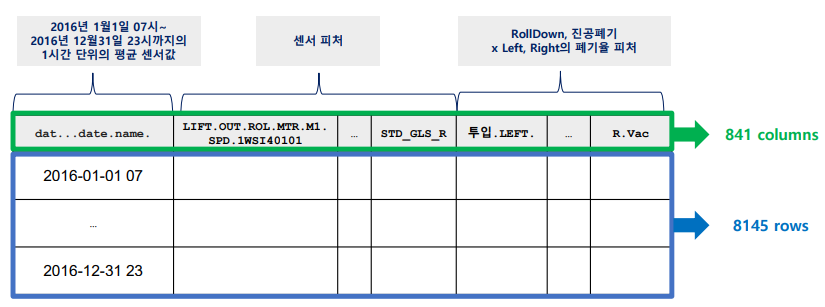

In [ ]:
null_columns=data.columns[data.isnull().all(axis=0)].tolist()
# print(null_columns)
print(len(null_columns))
null_rows = data.index[data.isnull().all(axis=1)]
print(len(null_rows))
data.drop(null_columns, axis=1)

이렇게 보았을 때, row에서는 전부 null인 것은 없고, 전부 null값을 가진 컬럼들만 제거하였다.

지금 컬럼이 841개나 된다. <br>
기억해야 하는 것은 어떤 것이 불량품에 큰 영향을 주는 컬럼인지 찾는 것이다.

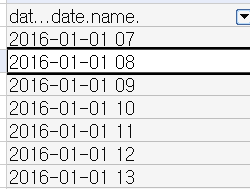

맨 위에도 서술하였지만, <br> 센서 측정값의 1시간 평균 데이터를 분석하여 저수율 요인을 찾고자 하였다는 것을 잊으면 안된다. <br>
각 row는 해당 날짜에서 1시간 평균 데이터를 분석한 것이다.

우리는 여기에서 RD (Rate of Defect) 를 확인하면 된다.

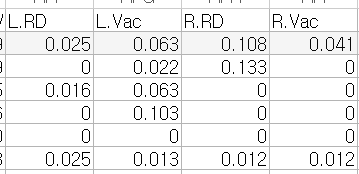

이때, L과 R이 계속 보인다.
Left도 보이고 L 등 방향에 관련된 feature들이 존재한다.

우선 크게 분산이 0인 컬럼들은 삭제할 것이다.
왜냐하면 동일하게 같은 값을 주었다면, 그 컬럼은 불량품을 만든 요인이 되기 어렵기 떄문이다.

In [ ]:
variances = data.var()
zero_variance_columns = variances[variances == 0].index.tolist()
print("Columns with zero variance:", zero_variance_columns)
data.drop(zero_variance_columns, axis=1)